# 2.1. Quality of raw counts

## Input

* `data-create_networks/yeast_Kelliher_2016/yeast_WT_counts.txt`: raw counts generated by featureCounts from Kelliher 2016 dataset.

## Output

* Figures
    * distribution of prior counts from each sample
    * MA-plots between successive samples
    * PCA plots of samples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as decomp

In [2]:
sns.set(style="whitegrid", context="talk", rc={"figure.figsize": (8,5)})

In [3]:
counts_file = '../../data-create_networks/yeast_Kelliher_2016/yeast_WT_counts.txt'

## Import data

In [4]:
pd.read_csv( counts_file, sep='\t', header=1, index_col=0 ).iloc[:,5:] 

,bam/SRR3405783.fastqAligned.out.bam,bam/SRR3405784.fastqAligned.out.bam,bam/SRR3405785.fastqAligned.out.bam,bam/SRR3405786.fastqAligned.out.bam,bam/SRR3405787.fastqAligned.out.bam,bam/SRR3405788.fastqAligned.out.bam,bam/SRR3405789.fastqAligned.out.bam,bam/SRR3405790.fastqAligned.out.bam,bam/SRR3405791.fastqAligned.out.bam,bam/SRR3405792.fastqAligned.out.bam,...,bam/SRR3405809.fastqAligned.out.bam,bam/SRR3405810.fastqAligned.out.bam,bam/SRR3405811.fastqAligned.out.bam,bam/SRR3405812.fastqAligned.out.bam,bam/SRR3405813.fastqAligned.out.bam,bam/SRR3405814.fastqAligned.out.bam,bam/SRR3405815.fastqAligned.out.bam,bam/SRR3405816.fastqAligned.out.bam,bam/SRR3405817.fastqAligned.out.bam,bam/SRR3405818.fastqAligned.out.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
YAL069W,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
YAL068W-A,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
YAL068C,0,1,0,2,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
YAL067W-A,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
YAL067C,58,77,119,46,39,40,48,75,100,114,...,112,121,105,50,56,51,76,70,75,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR201W,72,128,117,93,110,86,109,95,117,116,...,98,134,117,61,101,86,111,93,77,68
YPR202W,4,15,2,11,15,17,9,7,17,9,...,6,4,10,1,4,8,11,3,3,2
YPR203W,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
raw_counts = pd.read_csv( counts_file, sep='\t', header=1, index_col=0 ).iloc[:,5:]

print('File correspondancies:')
for i in range(len(raw_counts.columns)): print(f'{i*5}min\t{raw_counts.columns[i]}')

# change column names
raw_counts.columns = [ f'{i*5}min' for i in range(len(raw_counts.columns)) ]

# filter
raw_counts = round( raw_counts, 0 )
raw_counts = raw_counts[ (raw_counts.sum(axis=1) > 1) ]

# compute priorcounts
priorcounts = raw_counts.apply( lambda x: np.log2(x+1) )

File correspondancies:
0min	bam/SRR3405783.fastqAligned.out.bam
5min	bam/SRR3405784.fastqAligned.out.bam
10min	bam/SRR3405785.fastqAligned.out.bam
15min	bam/SRR3405786.fastqAligned.out.bam
20min	bam/SRR3405787.fastqAligned.out.bam
25min	bam/SRR3405788.fastqAligned.out.bam
30min	bam/SRR3405789.fastqAligned.out.bam
35min	bam/SRR3405790.fastqAligned.out.bam
40min	bam/SRR3405791.fastqAligned.out.bam
45min	bam/SRR3405792.fastqAligned.out.bam
50min	bam/SRR3405793.fastqAligned.out.bam
55min	bam/SRR3405794.fastqAligned.out.bam
60min	bam/SRR3405795.fastqAligned.out.bam
65min	bam/SRR3405796.fastqAligned.out.bam
70min	bam/SRR3405797.fastqAligned.out.bam
75min	bam/SRR3405798.fastqAligned.out.bam
80min	bam/SRR3405799.fastqAligned.out.bam
85min	bam/SRR3405800.fastqAligned.out.bam
90min	bam/SRR3405801.fastqAligned.out.bam
95min	bam/SRR3405802.fastqAligned.out.bam
100min	bam/SRR3405803.fastqAligned.out.bam
105min	bam/SRR3405804.fastqAligned.out.bam
110min	bam/SRR3405805.fastqAligned.out.bam
115min	bam

## Distribution of prior counts

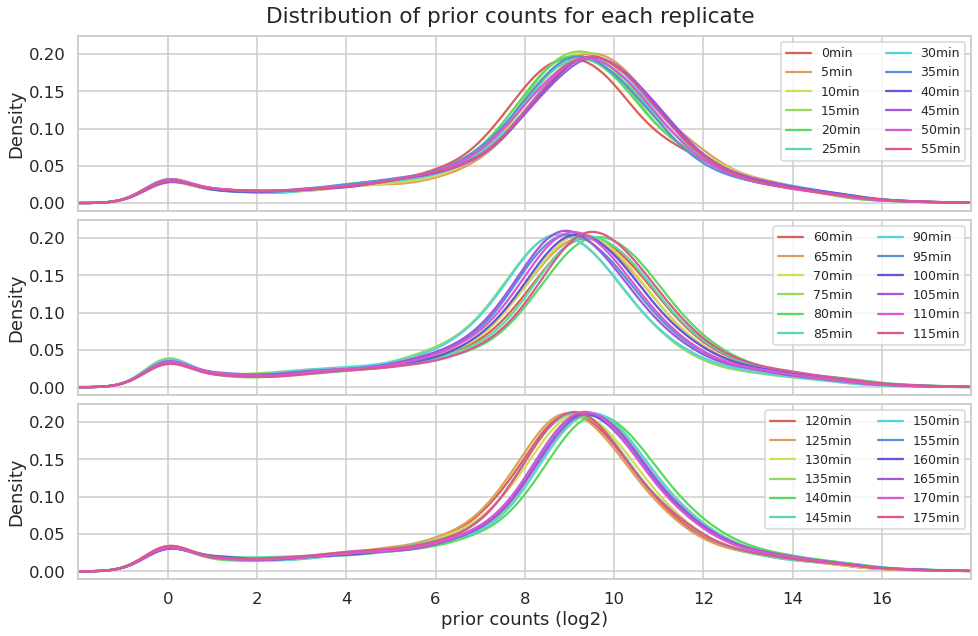

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=.05)
fig.suptitle('Distribution of prior counts for each replicate', x=.5, y=.92)

colors = sns.color_palette("hls", 12).as_hex()

for i in range(0,36,12):
    a = int(i/12)
    priorcounts.iloc[:,i:i+12].plot.kde( ax=axes[a], color=colors )
    axes[a].legend(fontsize='x-small', ncol=2)

axes[-1].set_xlabel("prior counts (log2)")
axes[-1].set_xlim([-2, 18])
axes[-1].set_xticks(range(0,18,2))

plt.show()

## MA-plots between samples
* X-axis: A = average of priorcounts for both samples.
* Y-axis: M = difference of priorcounts between the two samples.

In [7]:
def compute_MA( x, y ):
    M = x - y
    A = (x + y) / 2
    return pd.DataFrame( { "A": A, "M": M } )

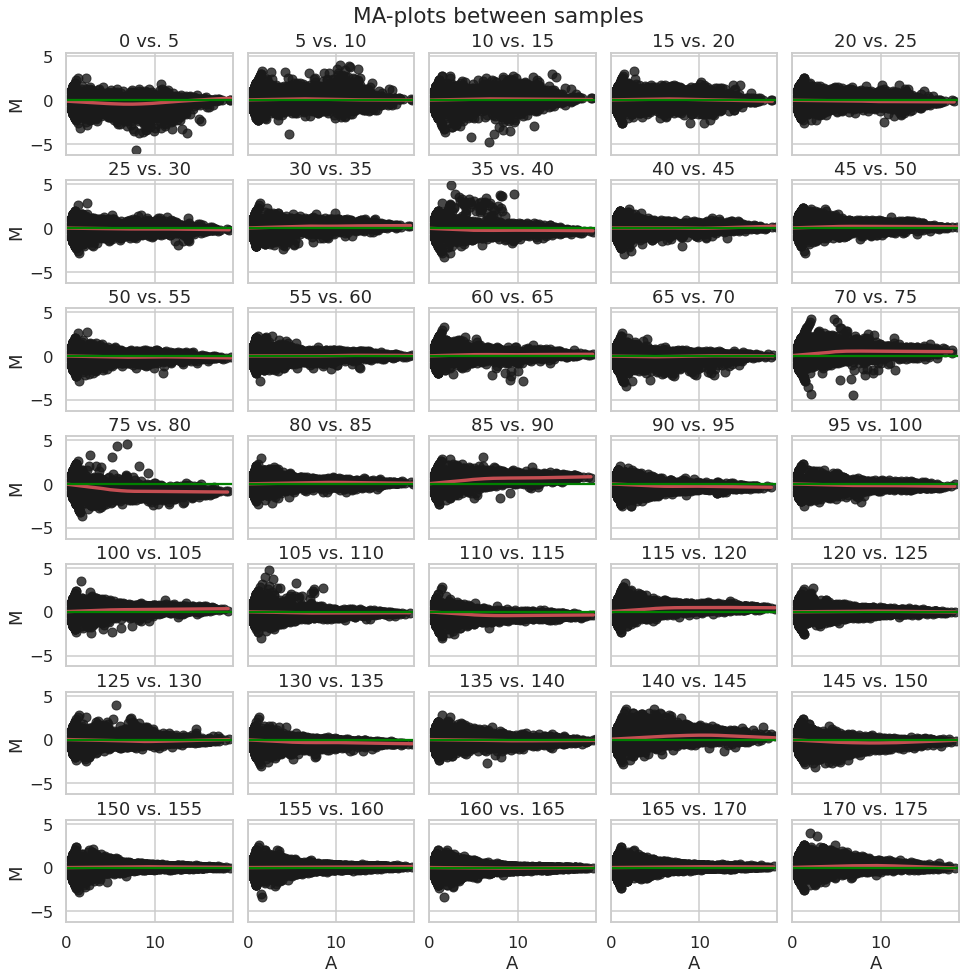

In [8]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(16, 16), sharex=True, sharey=True)
plt.subplots_adjust(wspace=.09, hspace=.25)
fig.suptitle('MA-plots between samples', x=.5, y=.92)

cols = priorcounts.columns
for a, ax in enumerate( axes.flatten() ):
    if a < 35:
        i, j = a, a+1
        MA = compute_MA( priorcounts[ cols[i] ], priorcounts[ cols[j] ] )
        sns.regplot( x="A", y="M", data=MA, ax=ax, lowess=True, line_kws={'color':'r'}, color="k" )
        ax.axhline( 0 , color='green' ) # ideal value
        ax.set_title( f'{cols[i][:-3]} vs. {cols[j][:-3]}' )
        ax.set_xlabel('A' if a > 30 else '')
        ax.set_ylabel('M' if a%5 == 0 else '')
    else: ax.axis('off')

## PCA plot

In [9]:
# decomposition into two components
pca = decomp.PCA(n_components=2)
principalComponents = pca.fit_transform( priorcounts.T.values )
principalDf = pd.DataFrame(principalComponents, columns = ['PC1', 'PC2'], index=priorcounts.columns).T
explained_var = pca.explained_variance_ratio_ # variance for each principal components

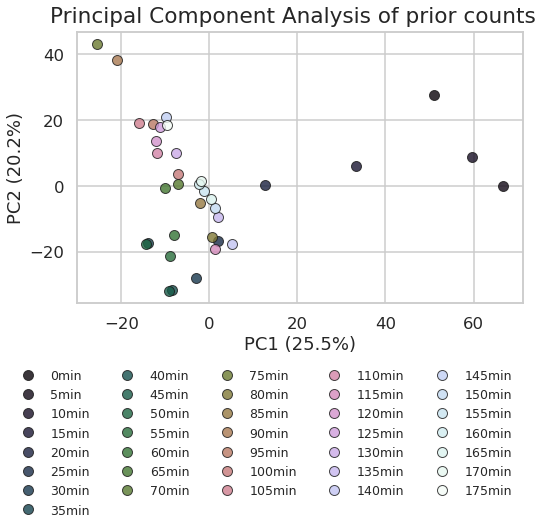

In [10]:
# display
fig, ax = plt.subplots(1, 1)
fig.suptitle('Principal Component Analysis of prior counts', x=.5, y=.95)

colors = sns.color_palette("cubehelix", 36).as_hex()

plots, names = [], []
for i, c in enumerate(principalDf):
    plots += ax.plot( principalDf[c]["PC1"], principalDf[c]["PC2"], "o", label=c,
             color=colors[i], alpha=0.8, ms=10, markeredgecolor="k", mew=1 )
    names.append(c)

#names = [ ' '.join(n.split('_')[:3]) for n in names ]
ax.legend( plots, names, frameon=False,
           loc='upper right', bbox_to_anchor=(1, -0.2),
           markerscale=1, fontsize='x-small', ncol=5
         ).get_frame().set_facecolor('white')

ax.set_xlabel( 'PC1 ({}%)'.format( str(round(explained_var[0]*100, 1)) ) )
ax.set_ylabel( 'PC2 ({}%)'.format( str(round(explained_var[1]*100, 1)) ) )

plt.show()